<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/WGU_MSDA/d205_linehan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D205 Data Acquisition Performance Assessment
Submitted by Neil Linehan, Student ID 012311228, for WGU's MSDA program

#A:QUESTION

My question is: “Do patients with anxiety have a lower income?” To answer this question, I will need to combine data from the *medical_data* database and the *mservices* CSV file. This will require the use of SQL to merge the data from both sources.

#A1:QUESTION JUSTIFICATION

I will answer the question by utilizing the provided data that lists each patient’s income level and anxiety status. By combining this information, I can select only those patients with anxiety and then compute the average income for these patients. I will repeat this process for patients without anxiety. Finally, by comparing these two averages, I can determine if the average income for patients with anxiety is lower than that of patients without anxiety.

#A2:IDENTIFYING DATA

To answer my question, I will need the following information from the orginal dataset under the 'medical_data' database:
* **Tables:** patient
* **Columns:** *patient_id* (text datatype), *income* (numeric datatype)

From the 'mservices.csv' file, I will need the following information:
* **Columns:** *patient_id* (text datatype), *Anxiety* (text datatype)

#B:ENTITY RELATIONSHIP DIAGRAM

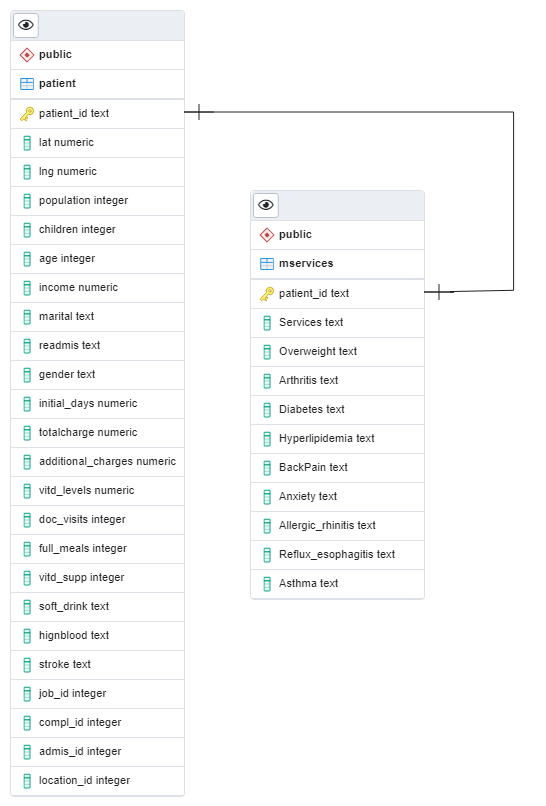

Figure 1. ERD diagram for this performance assessment, showing two tables joined on the *patient_id* primary keys.

The Entity Relationship Diagram (ERD) for the relationships between tables used to answer the question in this performance is shown above in Figure 1. As can be seen, the relationship between the *patient* table and the *mservices* table, generated from the add-on CSV file, is one-to-one or 1:1, as each *patient_id* in both tables is unique. This means that, according to this data, each patient received only one service. Note that pgAdmin does not support 1:1 relationships in ERD diagrams (pgAdmin, n.d.), so the output picture was edited in MS Paint to accurately display the relationship. The relational constraints for this relationship is between the *patient_id* foreign key in the *mservices* table.

#B1:RELATIONSHIP DISCUSSION

Figure 1 shows that the relationship between the *patient* and *mservices* tables is 1:1, as each patient has only one service performed. The *patient* table describes the demographic characteristics of each patient, while the *mservices* table describes a particular visit for a medical service, alongside some basic fields generated during the visit, which are either ‘Yes’ or ‘No’. An issue with this relationship is that it does not allow for multiple visits per patient. One-to-one relationships are typically not present in any datasets with a time component (Vertabelo, n.d.). To account for this, there should be some tracking of a visit date inside the *mservices* table.

#B2:STATEMENT FOR THE ERD

In [ ]:
CREATE TABLE public.mservices
(
    patient_id text,
    "Services" text,
    "Overweight" text,
    "Arthritis" text,
    "Diabetes" text,
    "Hyperlipidemia" text,
    "BackPain" text,
    "Anxiety" text,
    "Allergic_rhinitis" text,
    "Reflux_esophagitis" text,
    "Asthma" text,
    PRIMARY KEY (patient_id)
);

ALTER TABLE public.mservices
    OWNER to postgres;

ALTER TABLE public.mservices
ADD CONSTRAINT pat_id_fk FOREIGN KEY (patient_id) REFERENCES public.patient (patient_id);

The above code creates the *mservices* table, specifying the *patient_id* field as the primary key. It also defines a foreign key on *patient_id* between the *mservices* and *patient* tables (W3Schools, n.d.).

#B3:Loading CSV data

In [ ]:
--command " "\\copy public.mservices
 (patient_id, \"Services\", \"Overweight\", \"Arthritis\", \"Diabetes\",
 \"Hyperlipidemia\", \"BackPain\", \"Anxiety\", \"Allergic_rhinitis\",
  \"Reflux_esophagitis\", \"Asthma\")
  FROM 'C:/LabFiles/Medical/MSERVI~1.CSV'
  DELIMITER ','
  CSV HEADER
  QUOTE '\"'
  ESCAPE '''';""

**The above code is what was ouput from the pgAdmin GUI.**

In [ ]:
COPY public.mservices
(patient_id,
"Services",
"Overweight",
"Arthritis",
"Diabetes",
"Hyperlipidemia",
"BackPain",
"Anxiety",
"Allergic_rhinitis",
"Reflux_esophagitis",
"Asthma")
FROM 'C:/LabFiles/Medical/MSERVI~1.CSV'
DELIMITER ','
CSV HEADER
QUOTE '"'
ESCAPE '''';

**The above code is Query Editor ready code.**

The first code above was output from the Import/Export pgAdmin 4 GUI menu, while the second code accomplishes the same function and can be run in the Query Editor. It properly loads the data from the *mservices* CSV file into the *mservices* table created in part B. I tested the Query Editor code and it works as expected.

#C:SQL QUERY

In [ ]:
SELECT mservices."Anxiety", AVG(patient.income) AS average_income
FROM mservices
JOIN patient ON mservices.patient_id = patient.patient_id
GROUP BY mservices."Anxiety";

The above SQL code answers the question for this assessment. It first selects the mservices table, then performs a JOIN between the mservices and patient tables on the patient_id fields. It then groups the rows by values within the Anxiety column, which can either be ‘Yes’ or ‘No’, indicating whether the patient has anxiety. Finally, it selects the ‘Anxiety’ column under the *mservices* table, as well as the average of the ‘income’ column from the *patient* table, renaming the result as ‘average_income’. Note that since these fields were loaded in as camel case, double quotes is required to select them from the table (Atlassian, n.d.).

From this code, we get the following result:

|Anxiety | average_income |
| ------ | -------------- |
| No |  40410.816627855564 |
| Yes | 40658.650320373250 |

From these results, we can answer the question: do patients with anxiety have lower income? According to this data, the answer to the question is no. In fact, the patients with anxiety have a slightly higher average income than those without. The results are however quite close, and additional statistical tests may need to be performed before we can feel more confident in declaring that the income levels are significantly different.

#C1:CSV FILES

"Anxiety","average_income"

"No","40410.816627855564"

"Yes","40658.650320373250"

The above CSV file content is attached alongside this performance assessment submission as: *d205_C1_linehan.csv*. It contains the results from the query that answers the question regarding anxiety and income.

#D:ADD-ON FILE TIME PERIOD

The data from the *mservices* CSV file regarding the anxiety levels of the patients should be refreshed once a year.

#D1:EXPLANATION OF TIME PERIOD

The data should be refreshed once a year, because this should align with annual checkups or other medical services received. Additionally, the income levels of the patients may change over a year, either due to changes in inflation or other external factors. So this would also require refreshing the patient data once a year as well. This data would be a good metric for medical businesses to monitor, because if there appears to be a significant relationship between patient anxiety and lower income, due to external factors in the economy, say widespread layoffs, then the decisions made by medical business management can be accurately adjusted to account for this, such as taking different approaches utilizing the biopsychosocial model.

#E:PANOPTO VIDEO
The required video is attached to the task as: *D205_Linehan_Video*

#F:WEB SOURCES

Atlassian. (n.d.). *Single, double quote, and backticks in MySQL queries.* Retrieved  July 11, 2024, from https://www.atlassian.com/data/sql/ingle-double-quote-and-backticks-in-mysql-queries

W3Schools. (n.d.). *SQL foreign key.* Retrieved July 11, 2024, from https://www.w3schools.com/sql/sql_foreignkey.asp

pgAdmin. (n.d.). *ERD Tool.* Retrieved July 11, 2024, from https://www.pgadmin.org/docs/pgadmin4/development/erd_tool.html#table-relationship-options